In [5]:
#Por último, creamos una gráfica de oscilación de Van der Pol que considere el amortiguamiento. Para eso se debe agregar una fucnión
#senoidal, por lo que creamos un nuevo vectorfield.
from numpy import *
from scipy.integrate import odeint

def dX_dt(w, t, p):
    
    x, y = w
    
    p = A, omega, mu
    
    """ Return the ecuation for the Van der Pol oscillator.  """
    f = [ y,  mu * (1 - x ** 2) * y - x + A * sin(omega * t)]
    
    return f

In [6]:
#vamos a darles valores a los parámetros
mu = 8.53
A = 1.2
omega = 2 * pi / 10

#Valores a las variables
x =  -1.0
y = 3.0

# Parametros de la ED
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 1000.0
numpoints = 2250

#Creamos los valores del tiempo, entre mas puntos damos, mejores se veran las graficas.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

#Ponemos las variables del vector:
w0 = [x, y]

# Llamamos a la funcion para resolver la ED
wsol = odeint(dX_dt, w0, t, args=(mu,),
              atol=abserr, rtol=relerr)

with open('Act8.18.dat', 'w') as f:
    # Imprimimos en el documento la solución
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], file=f)

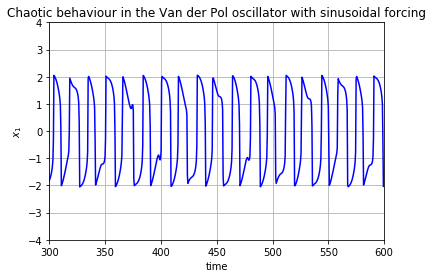

In [7]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, xlim, ylim, ylabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x, y = loadtxt('Act8.18.dat', unpack=True)

f1 = figure()

plot(t, x, 'b-')
grid()
xlim(300,600)
ylim(-4, 4)
xlabel('time')
ylabel('$x_1$')
title('Chaotic behaviour in the Van der Pol oscillator with sinusoidal forcing')
f1.savefig('Image4.png')